# Clustering Wine Types with PCA and Random Forest Classifier

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings("ignore")
plt.rcParams["figure.figsize"] = (7,4)

In [2]:
!pip install seaborn==0.13.0

In [3]:
df = pd.read_csv("Wine.csv")

In [4]:
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [5]:
df.shape

(178, 14)

In [6]:
df.isnull().sum().any()

False

In [7]:
df.duplicated().sum().any()

False

In [8]:
df.Customer_Segment.unique()

array([1, 2, 3], dtype=int64)

In [9]:
df.Customer_Segment.value_counts()

Customer_Segment
2    71
1    59
3    48
Name: count, dtype: int64

In [10]:
df["Customer_Segment"] = df.Customer_Segment.map({3: 1, 2: 2, 1: 3})

# top quality wines are coded as 1, medium quality wines 2, poor quality wines 3.
# We code quality wines as 3 and poor quality wines as 1 in order to make their interpretation easier to understand.

In [11]:
df.Customer_Segment.value_counts()

Customer_Segment
2    71
3    59
1    48
Name: count, dtype: int64

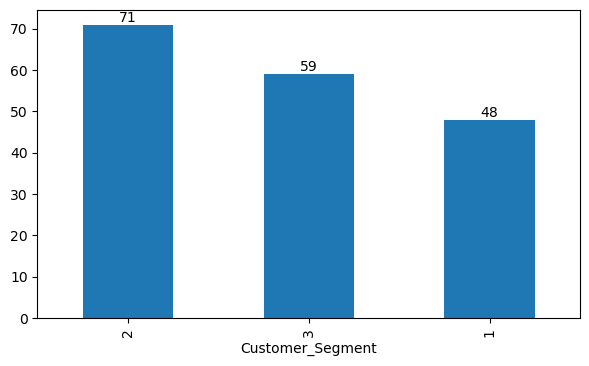

In [12]:
ax = df.Customer_Segment.value_counts().plot.bar()
ax.bar_label(ax.containers[0]);

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
Malic_Acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
Ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
Ash_Alcanity,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
Magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
Total_Phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
Flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
Nonflavanoid_Phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
Proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58
Color_Intensity,178.0,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00


<Axes: >

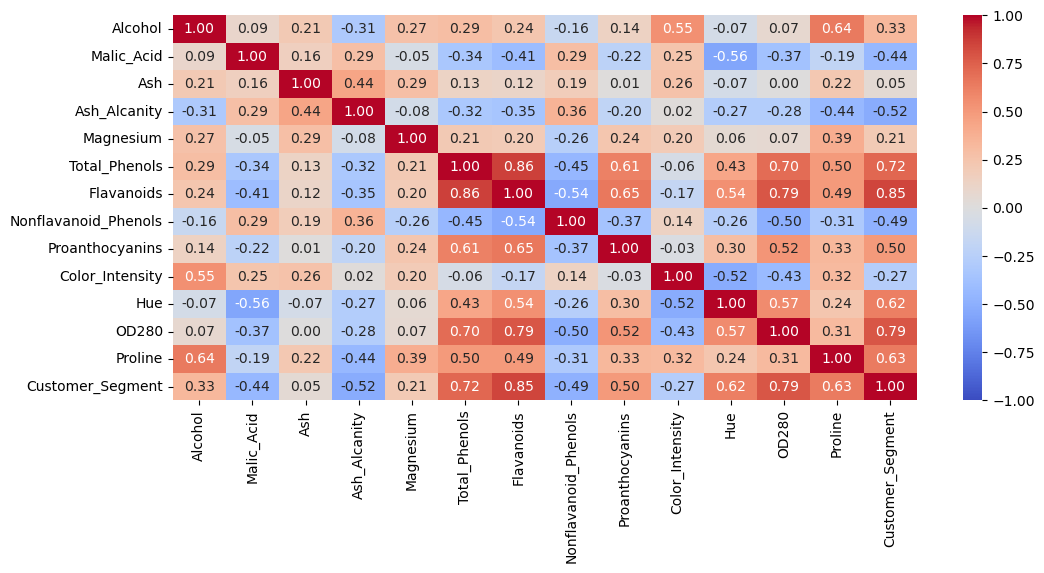

In [14]:
plt.figure(figsize=(12,5))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt=".2f")

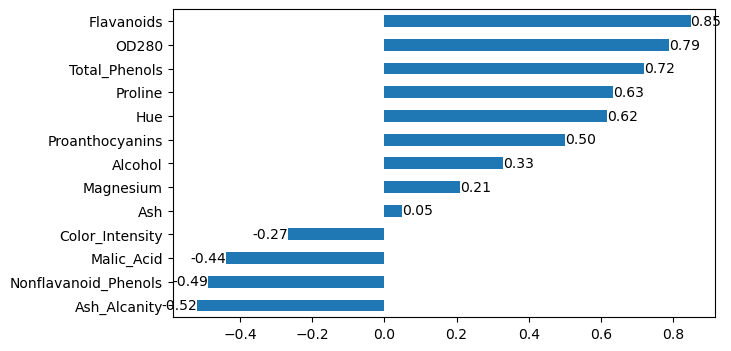

In [15]:
ax = df.corr()["Customer_Segment"][:-1].sort_values().plot(kind="barh")
ax.bar_label(ax.containers[0], fmt="%.2f");

## Split the Data

In [16]:
X = df.drop("Customer_Segment", axis=1)

In [17]:
y = df["Customer_Segment"]

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size=0.2,
                                                    stratify=y,
                                                    random_state=0)

## Modeling with Random Forest

In [19]:
from sklearn.metrics import confusion_matrix, classification_report

In [20]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [21]:
from sklearn.ensemble import RandomForestClassifier

# herhangibir modeli tercih edebiliriz.

In [22]:
classifier = RandomForestClassifier(random_state=0)
classifier.fit(X_train, y_train)
eval_metric(classifier, X_train, y_train, X_test, y_test)

Test_Set
[[10  0  0]
 [ 0 14  0]
 [ 0  1 11]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       0.93      1.00      0.97        14
           3       1.00      0.92      0.96        12

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36


Train_Set
[[38  0  0]
 [ 0 57  0]
 [ 0  0 47]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        38
           2       1.00      1.00      1.00        57
           3       1.00      1.00      1.00        47

    accuracy                           1.00       142
   macro avg       1.00      1.00      1.00       142
weighted avg       1.00      1.00      1.00       142



In [23]:
from sklearn.model_selection import cross_validate

model = RandomForestClassifier(random_state=0)

scores = cross_validate(model,
                        X_train,
                        y_train,
                        scoring=['accuracy',
                                 'precision_micro',
                                 'recall_micro',
                                 'f1_micro'], 
                        cv=10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()[2:]

test_accuracy            0.985714
train_accuracy           1.000000
test_precision_micro     0.985714
train_precision_micro    1.000000
test_recall_micro        0.985714
train_recall_micro       1.000000
test_f1_micro            0.985714
train_f1_micro           1.000000
dtype: float64

In [24]:
classifier.feature_importances_

array([0.09118767, 0.03337355, 0.01428735, 0.04553722, 0.02403198,
       0.04182253, 0.18429102, 0.01254126, 0.03013279, 0.15017738,
       0.06761653, 0.09590212, 0.20909858])

In [25]:
X.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [26]:
feats = pd.DataFrame(index=X.columns,
                     data=classifier.feature_importances_, 
                     columns=['Importance'])
imp_feats = feats.sort_values("Importance")
imp_feats

,Importance
Nonflavanoid_Phenols,0.012541
Ash,0.014287
Magnesium,0.024032
Proanthocyanins,0.030133
Malic_Acid,0.033374
Total_Phenols,0.041823
Ash_Alcanity,0.045537
Hue,0.067617
Alcohol,0.091188
OD280,0.095902


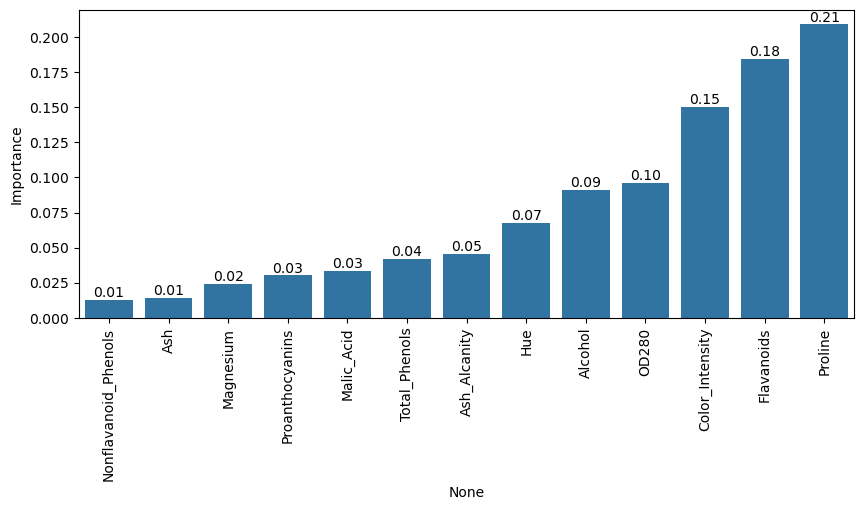

In [27]:
plt.figure(figsize=(10,4))
ax = sns.barplot(data=imp_feats.sort_values('Importance'),
                 x=imp_feats.sort_values('Importance').index,
                 y='Importance')
plt.xticks(rotation=90)
ax.bar_label(ax.containers[0], fmt="%.2f");

## Remodelling by feature importance

In [28]:
X2 = df[["Proline", "Color_Intensity", "Flavanoids"]]

# We can do drop complexcity with feature selection as well as by applying feature transformation with PCA.

In [29]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,
                                                        y,
                                                        test_size=0.2,
                                                        stratify=y,
                                                        random_state=0)

In [30]:
classifier2 = RandomForestClassifier(random_state=0)
classifier2.fit(X_train2, y_train2)
eval_metric(classifier2, X_train2, y_train2, X_test2, y_test2)

Test_Set
[[ 9  1  0]
 [ 0 14  0]
 [ 0  1 11]]
              precision    recall  f1-score   support

           1       1.00      0.90      0.95        10
           2       0.88      1.00      0.93        14
           3       1.00      0.92      0.96        12

    accuracy                           0.94        36
   macro avg       0.96      0.94      0.95        36
weighted avg       0.95      0.94      0.94        36


Train_Set
[[38  0  0]
 [ 0 57  0]
 [ 0  0 47]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        38
           2       1.00      1.00      1.00        57
           3       1.00      1.00      1.00        47

    accuracy                           1.00       142
   macro avg       1.00      1.00      1.00       142
weighted avg       1.00      1.00      1.00       142



In [31]:
model = RandomForestClassifier(random_state=0)

scores = cross_validate(model,
                        X_train2,
                        y_train2,
                        scoring=['accuracy',
                                 'precision_micro',
                                 'recall_micro',
                                 'f1_micro'], 
                        cv=10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()[2:]

test_accuracy            0.992857
train_accuracy           1.000000
test_precision_micro     0.992857
train_precision_micro    1.000000
test_recall_micro        0.992857
train_recall_micro       1.000000
test_f1_micro            0.992857
train_f1_micro           1.000000
dtype: float64

## Remodelling by PCA

## Scaling Data

In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
scaler = StandardScaler()

In [34]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

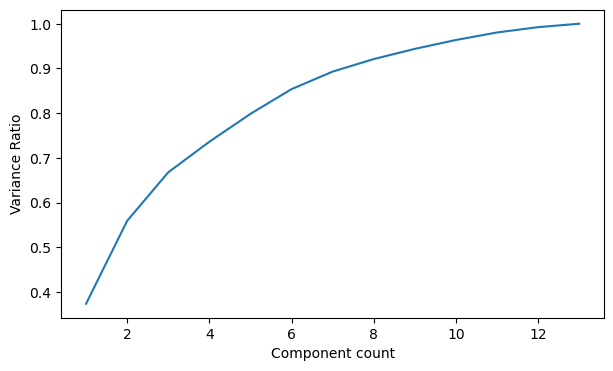

In [35]:
from sklearn.decomposition import PCA

pca = PCA().fit(X_train_scaled)
x = range(1,14)
plt.plot(x, pca.explained_variance_ratio_.cumsum())
plt.xlabel("Component count")
plt.ylabel("Variance Ratio");

In [36]:
pca = PCA(n_components=13).fit(X_train_scaled)

In [37]:
my_dict = {"explained_variance": pca.explained_variance_, 
           "explained_variance_ratio": pca.explained_variance_ratio_,
           "cumsum_explained_variance_ratio": pca.explained_variance_ratio_.cumsum()}

In [38]:
df_ev = pd.DataFrame(my_dict, index=range(1,14))
df_ev

,explained_variance,explained_variance_ratio,cumsum_explained_variance_ratio
1,4.900353,0.374296,0.374296
2,2.425735,0.185281,0.559577
3,1.418460,0.108344,0.667921
4,0.895242,0.068380,0.736300
5,0.815036,0.062254,0.798554
6,0.724387,0.055330,0.853884
7,0.512169,0.039120,0.893004
8,0.366809,0.028017,0.921021
9,0.298387,0.022791,0.943812
10,0.260014,0.019860,0.963673


In [39]:
df_ev.explained_variance.sum()

13.092198581560293

In [40]:
pca = PCA(n_components=3) # = 0.66

# Edited as n_components=3 both because we have strong features in our data and because I will be using 3D visuals.
# If we write a float value between 0 and 1 against n_components, the PCA algorithm returns components with information corresponding to the value we entered.

In [41]:
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [42]:
df_pca_train = pd.DataFrame(X_train_pca)
df_pca_train = df_pca_train.rename(columns={0: "first_component",
                                            1: "second_component",
                                            2: "third_component"})
df_pca_train.head()

# 

,first_component,second_component,third_component
0,-0.322303,0.499076,1.642651
1,-2.752398,-0.684364,0.822388
2,-0.050845,2.055769,0.801012
3,2.840375,-1.312747,-0.476727
4,-0.720359,2.705395,-0.760566


In [43]:
df_pca_test=pd.DataFrame(X_test_pca)
df_pca_test = df_pca_test.rename(columns={0: "first_component",
                                          1: "second_component",
                                          2: "third_component"})
df_pca_test.head()

,first_component,second_component,third_component
0,-0.489767,2.337936,1.178843
1,-2.228090,-2.702401,0.584823
2,-1.218574,0.605429,1.887888
3,-2.212360,-2.625781,1.584889
4,-0.535533,1.899966,1.252930


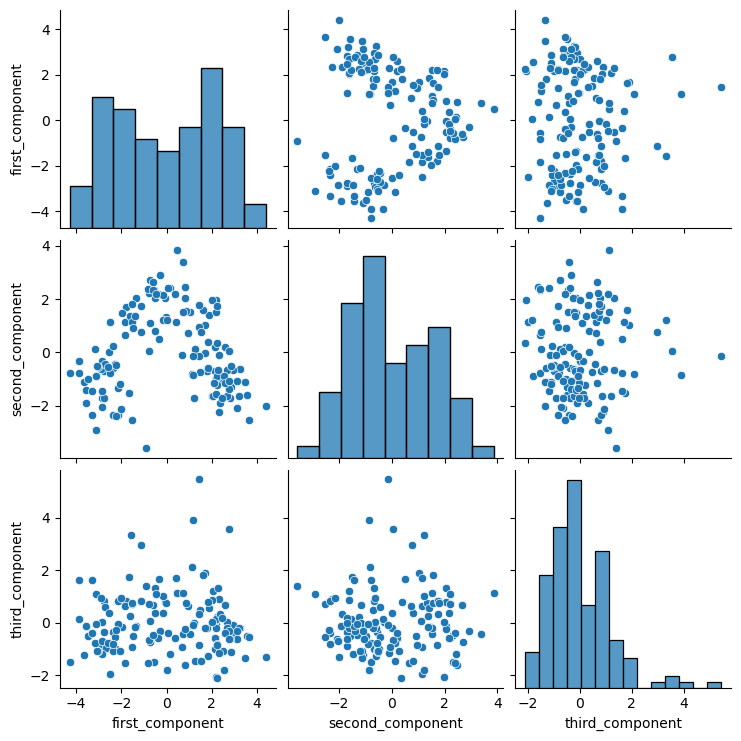

In [44]:
sns.pairplot(df_pca_train)

<Axes: >

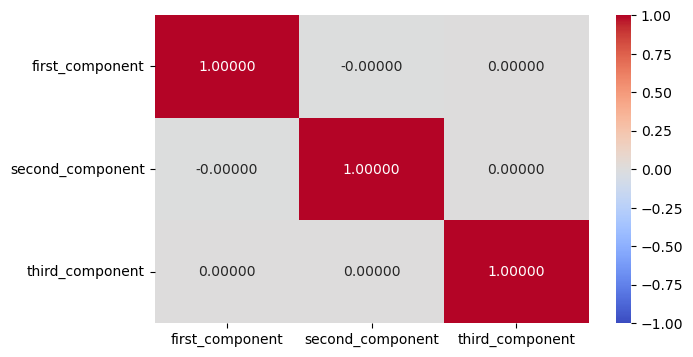

In [45]:
sns.heatmap(df_pca_train.corr(),vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt=".5f")

## Modelling after PCA

In [46]:
classifier3 = RandomForestClassifier(max_depth=2, random_state=0)
classifier3.fit(X_train_pca, y_train)
eval_metric(classifier3, X_train_pca, y_train, X_test_pca, y_test)

# max_dept=2 is just used to add some bias to the train data.

Test_Set
[[ 9  0  1]
 [ 0 13  1]
 [ 0  1 11]]
              precision    recall  f1-score   support

           1       1.00      0.90      0.95        10
           2       0.93      0.93      0.93        14
           3       0.85      0.92      0.88        12

    accuracy                           0.92        36
   macro avg       0.92      0.92      0.92        36
weighted avg       0.92      0.92      0.92        36


Train_Set
[[38  0  0]
 [ 1 53  3]
 [ 0  1 46]]
              precision    recall  f1-score   support

           1       0.97      1.00      0.99        38
           2       0.98      0.93      0.95        57
           3       0.94      0.98      0.96        47

    accuracy                           0.96       142
   macro avg       0.96      0.97      0.97       142
weighted avg       0.97      0.96      0.96       142



In [47]:
from sklearn.pipeline import Pipeline

In [48]:
operations = [("scaler", StandardScaler()), 
              ("PCA",PCA(n_components=3)),
              ("RF", RandomForestClassifier(max_depth=2, random_state=0))]

pipe_model = Pipeline(steps=operations)
                                             
scores = cross_validate(pipe_model,
                        X_train, 
                        y_train, 
                        scoring=['accuracy',
                                 'precision_micro',
                                 'recall_micro',
                                 'f1_micro'], 
                        cv=10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()[2:] 

# If the conversion algorithms are not used together with the pipeline, it may cause data leakege in the CV stage.

test_accuracy            0.957143
train_accuracy           0.969488
test_precision_micro     0.957143
train_precision_micro    0.969488
test_recall_micro        0.957143
train_recall_micro       0.969488
test_f1_micro            0.957143
train_f1_micro           0.969488
dtype: float64

## Visualization of Components

In [49]:
import plotly.express as px
fig = px.scatter_3d(x=df_pca_train["first_component"], 
                    y=df_pca_train["second_component"], 
                    z=df_pca_train["third_component"], 
                    color=y_train)
fig.show();

# The 3D image below is the image containing the most variance of 13 features.

END OF THE PROJECT